# Recurrent Neural Networks (RNN)

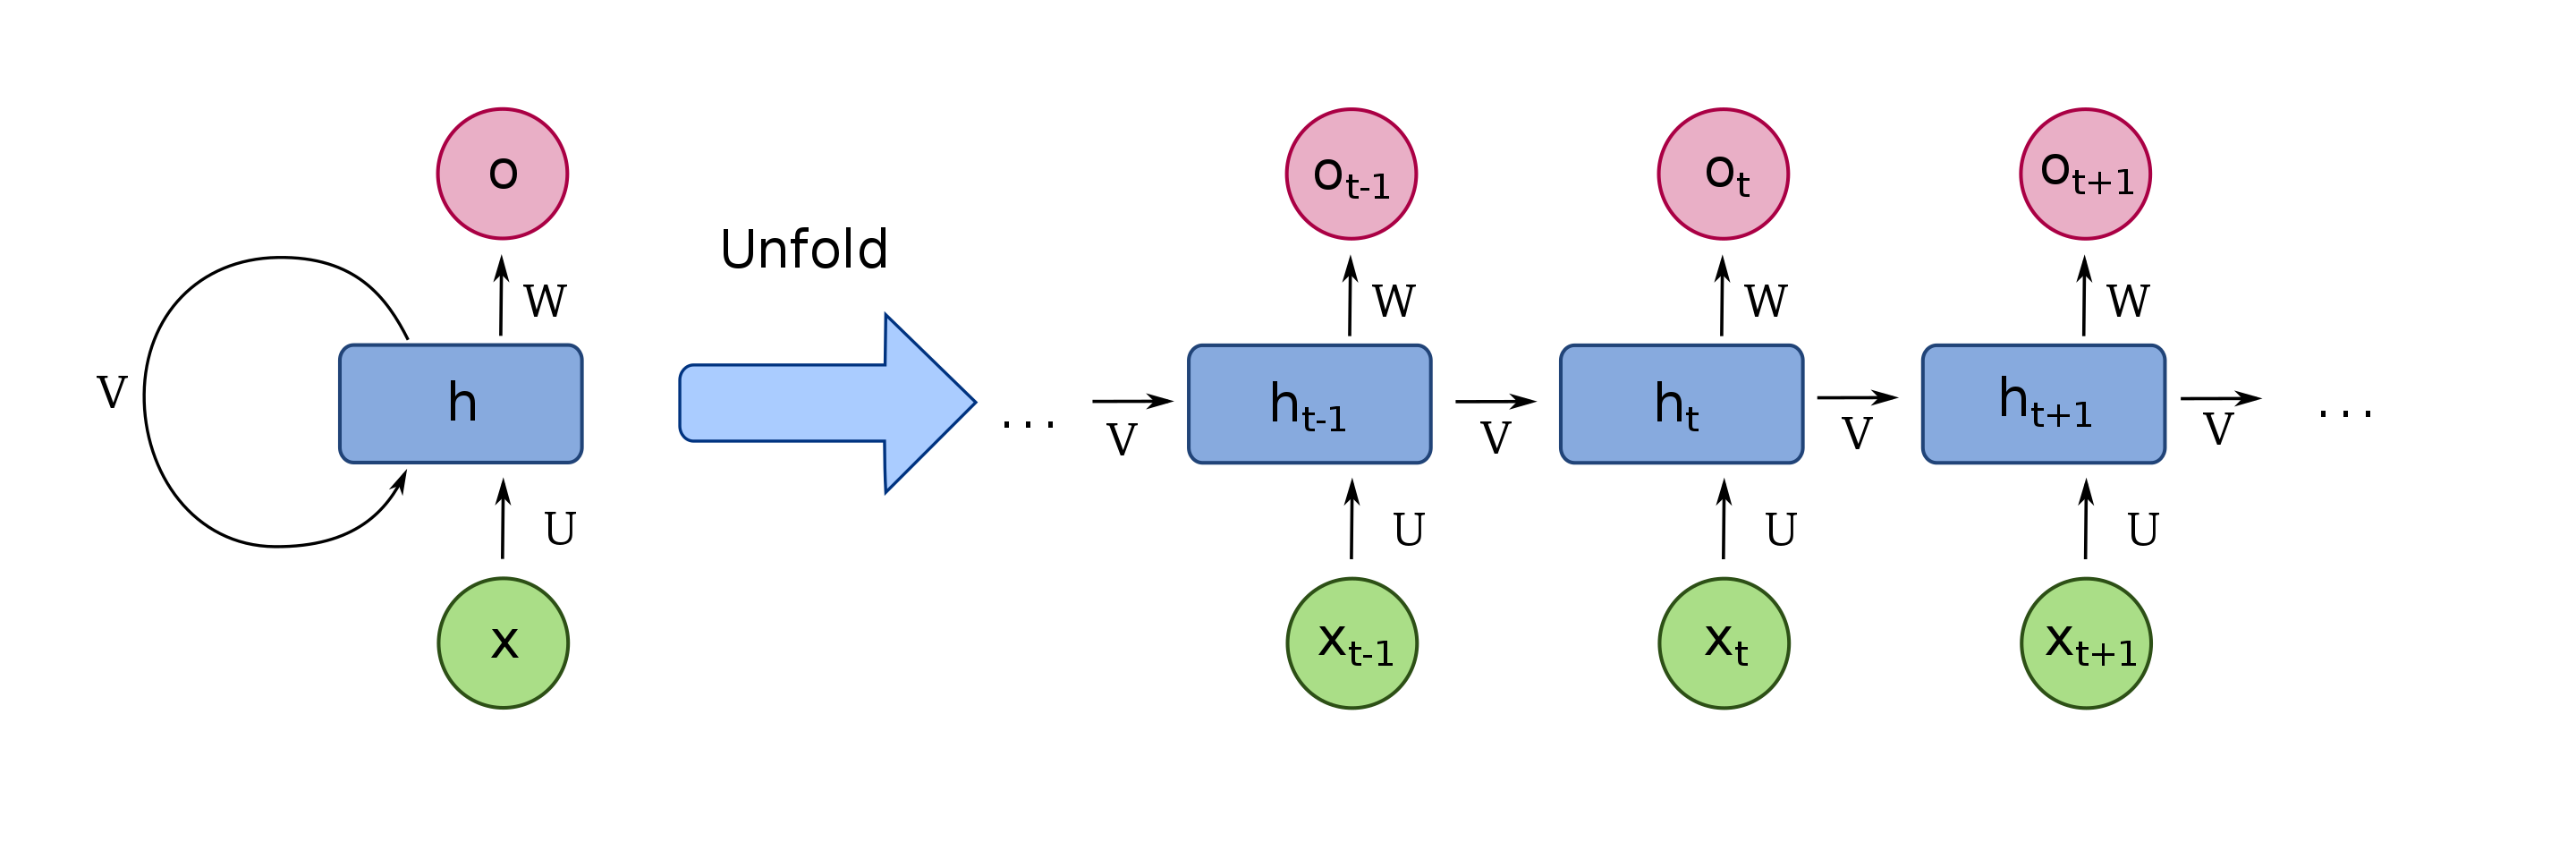

In [6]:
# data

import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras import models 
from keras import layers
import pandas as pd

zip_path = keras.utils.get_file(
    origin='https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip',
    fname='jena_climate_2009_2016.csv.zip',
    extract=True)
csv_path, _ = os.path.splitext(zip_path)
df = pd.read_csv(csv_path)

temp=df['T (degC)']

split_fraction = 0.8
train_split = int(split_fraction * int(df.shape[0]))

step = 6 # 1시간 마다
past = 240 # 10 일
tomo = 24 # 24 시간

temp=np.array(df['T (degC)'])
temp = temp[::step]
train_split=(int)(0.7*len(temp))

data = (temp[:train_split]-np.mean(temp[:train_split]))/np.std(temp[:train_split])
test = (temp[train_split:]-np.mean(temp[train_split:]))/np.std(temp[train_split:])

def gent(ts, lookback):
    X, Y = [], []
    for i in range(len(ts) // lookback):
        X.append(ts[i*lookback:(i+1)*lookback],)
        Y.append(ts[(i+1)*lookback])
    return np.array(X), np.array(Y)

gen=gent(data,past)

In [7]:
X_train = np.reshape(gen[0], (len(gen[0]), gen[0].shape[1], 1))
y=gen[1]

gen=gent(test,past)
X_test = np.reshape(gen[0], (len(gen[0]), gen[0].shape[1], 1))
y_test=gen[1]

In [8]:
X_train.shape, y.shape

((204, 240, 1), (204,))

In [10]:
rnn = models.Sequential()
rnn.add(layers.SimpleRNN(32, activation='relu', input_shape = (240,1), return_sequences=False))
rnn.add(layers.Dense(1))
rnn.compile(optimizer='adam',loss='mse',metrics=['acc'])

In [11]:
rnn.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_3 (SimpleRNN)     (None, 32)                1088      
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 1,121
Trainable params: 1,121
Non-trainable params: 0
_________________________________________________________________


In [16]:
history=rnn.fit(X_train,y,epochs=30,verbose=0,validation_data=(X_test, y_test))

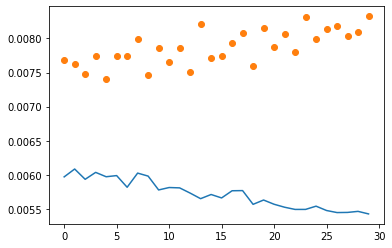

In [17]:
loss=history.history['loss']
val=history.history['val_loss']
plt.plot(loss)
plt.plot(val,'o')

In [15]:
y1=rnn.predict(X_test).flatten()
y2=y_test

np.mean(np.abs(y1-y2)), np.mean(np.abs(y1-y2))*np.std(temp)

(0.06103428350010714, 0.5141407050464795)

# Long Short-Term Memory (LSTM) 
* Hidden and cell variables

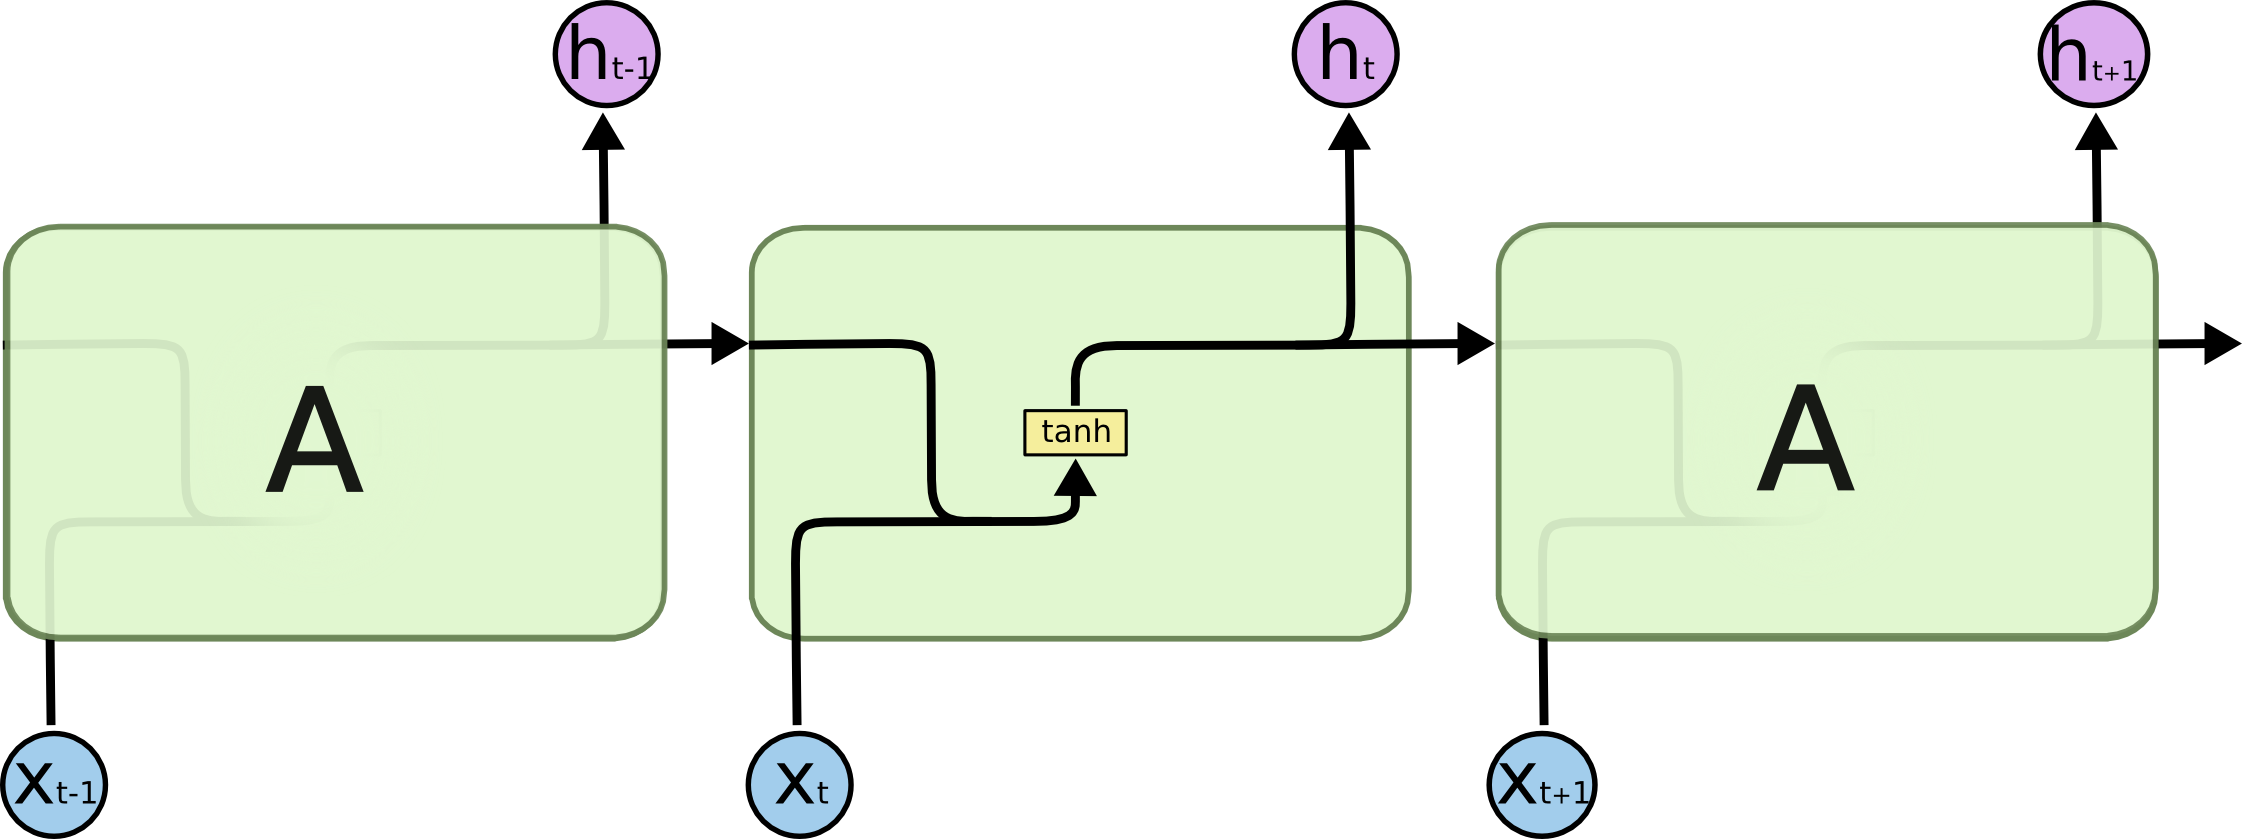

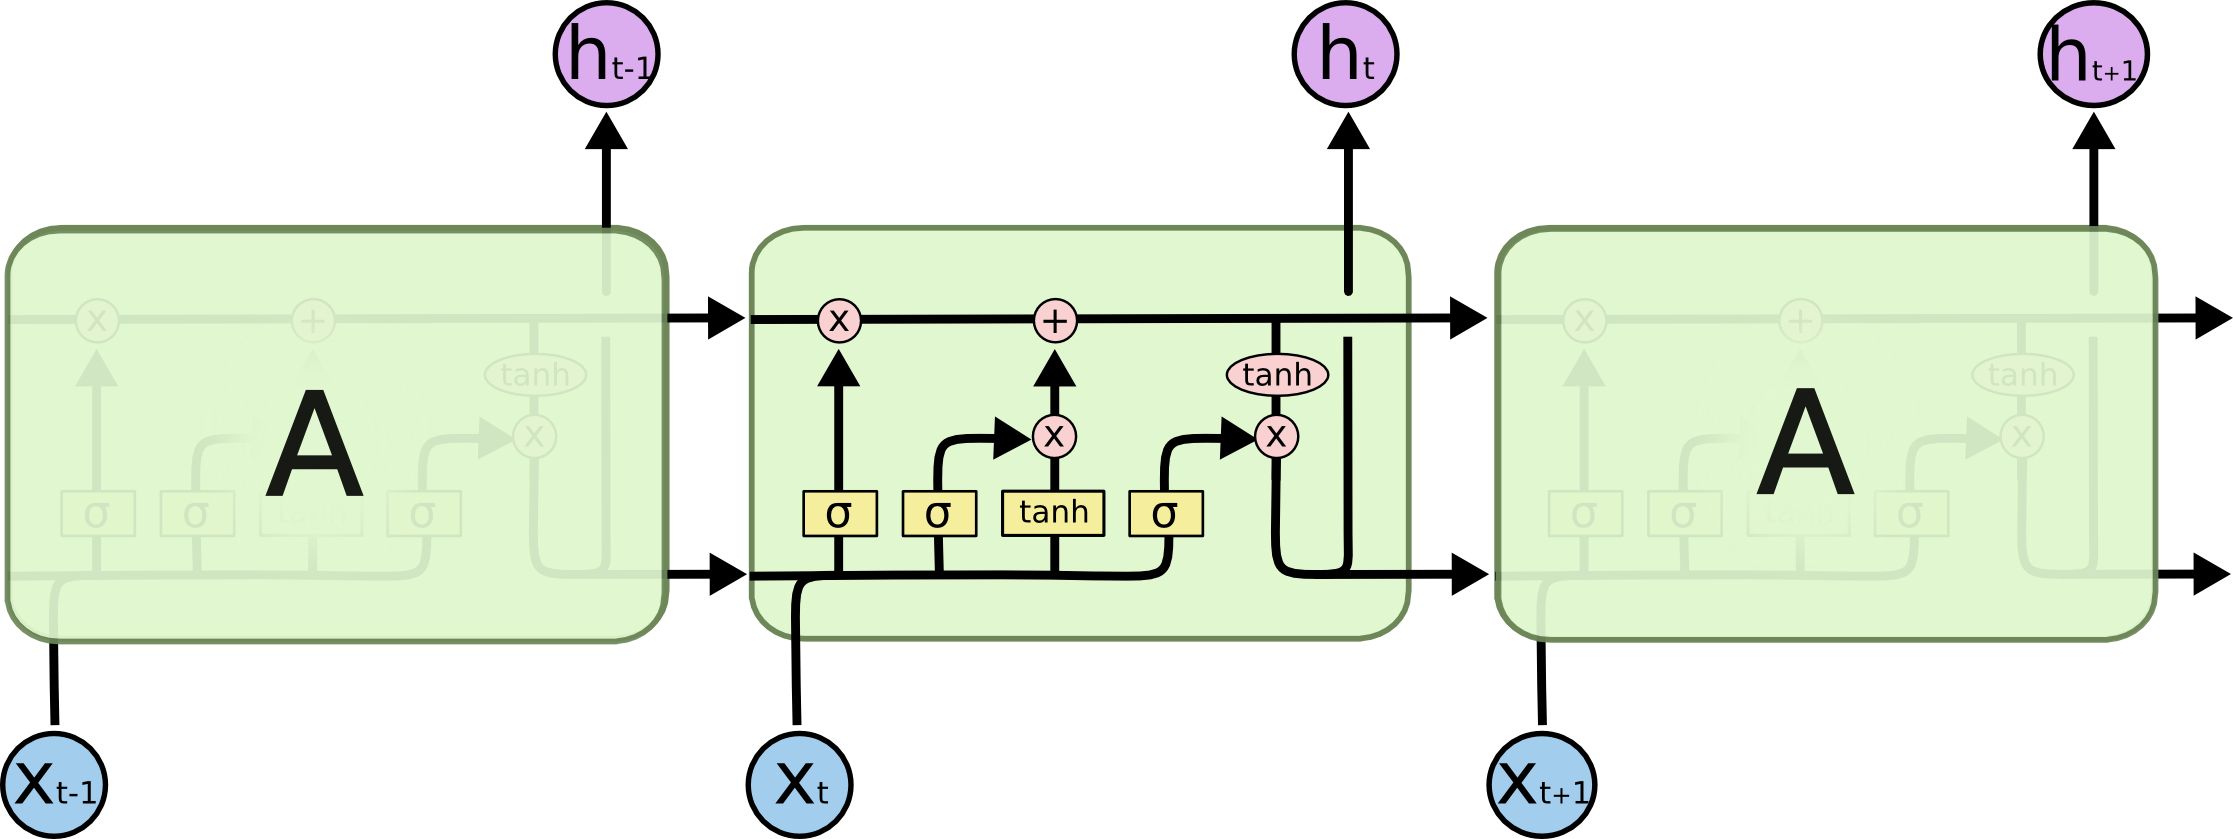

In [117]:
lstm = models.Sequential()
lstm.add(layers.LSTM(16, input_shape = (240,1)))
lstm.add(layers.Dense(1))
lstm.compile(optimizer='nadam',loss='mse',metrics=['acc'])

In [112]:
lstm.summary()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_17 (LSTM)               (None, 16)                1152      
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 17        
Total params: 1,169
Trainable params: 1,169
Non-trainable params: 0
_________________________________________________________________


In [113]:
from sklearn.preprocessing import MinMaxScaler

gen=gent(data,past)

x=gen[0]
scaler=MinMaxScaler(feature_range=(0,1))
scaler.fit(x)
x=scaler.transform(x)

X_train = np.reshape(x, (len(x), x.shape[1], 1))
y=gen[1]

gen=gent(test,past)
x=gen[0]
scaler=MinMaxScaler(feature_range=(0,1))
scaler.fit(x)
x=scaler.transform(x)

X_test = np.reshape(x, (len(x), x.shape[1], 1))
y_test=gen[1]

In [114]:
history=lstm.fit(X_train,y,epochs=20,validation_data=(X_test, y_test))

Epoch 1/20
7/7 [==============================] - 0s 71ms/step - loss: 0.8049 - acc: 0.0000e+00 - val_loss: 1.2500 - val_acc: 0.0000e+00
Epoch 2/20
7/7 [==============================] - 0s 36ms/step - loss: 0.7829 - acc: 0.0000e+00 - val_loss: 1.2032 - val_acc: 0.0000e+00
Epoch 3/20
7/7 [==============================] - 0s 36ms/step - loss: 0.7591 - acc: 0.0000e+00 - val_loss: 1.1683 - val_acc: 0.0000e+00
Epoch 4/20
7/7 [==============================] - 0s 36ms/step - loss: 0.7297 - acc: 0.0000e+00 - val_loss: 1.1193 - val_acc: 0.0000e+00
Epoch 5/20
7/7 [==============================] - 0s 36ms/step - loss: 0.6902 - acc: 0.0000e+00 - val_loss: 1.0479 - val_acc: 0.0000e+00
Epoch 6/20
7/7 [==============================] - 0s 37ms/step - loss: 0.6132 - acc: 0.0000e+00 - val_loss: 0.8039 - val_acc: 0.0000e+00
Epoch 7/20
7/7 [==============================] - 0s 36ms/step - loss: 0.4315 - acc: 0.0000e+00 - val_loss: 0.6148 - val_acc: 0.0000e+00
Epoch 8/20
7/7 [=========================

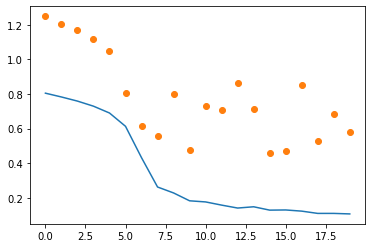

In [115]:
loss=history.history['loss']
val=history.history['val_loss']
plt.plot(loss)
plt.plot(val,'o')

In [110]:
y1=lstm.predict(X_test).flatten()
y2=y_test

np.mean(np.abs(y1-y2)), np.mean(np.abs(y1-y2))*np.std(temp)

(0.5608626682357755, 4.724595934356878)